In [121]:
import pandas as pd
import numpy as np
from Univariate import Univariate
from Univariate import central_tendency_percentile

In [122]:
dataset= pd.read_csv("kidney_disease.csv")

In [134]:
dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [126]:
# Step 2: Replace known missing symbols with NaN
dataset.replace(['?', ' ?', '\t?', '\t'], np.nan, inplace=True)
# Step 3: Identify numerical and categorical columns
num_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
cat_cols = dataset.select_dtypes(include=['object']).columns
# Step 4: Handle missing values in numerical columns (Median)
for col in num_cols:
    dataset[col].fillna(dataset[col].median(), inplace=True)
# Step 5: Handle missing values in categorical columns (Mode)                  #perprocessing Steps
for col in cat_cols:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)
# Step 6: Verify no null values remain
print(dataset.isnull().sum())


id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_17680\1435378963.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_17680\1435378963.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [127]:
dataset.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [128]:
dataset.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [129]:
dataset.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [135]:
central_tendency_per_IQR=central_tendency_percentile.MMM_per_IQR(dataset,quan)

In [136]:
central_tendency_per_IQR

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
Mean,199.5,51.5625,76.575,1.017712,0.9,0.395,145.0625,56.693,2.997125,137.63125,4.57725,12.5425
Median,199.5,55.0,80.0,1.02,0.0,0.0,121.0,42.0,1.3,138.0,4.4,12.65
Mode,0,55.0,80.0,1.02,0.0,0.0,121.0,42.0,1.2,138.0,4.4,12.65
Q1:25%,99.75,42.0,70.0,1.015,0.0,0.0,101.0,27.0,0.9,135.0,4.0,10.875
Q2:50%,199.5,55.0,80.0,1.02,0.0,0.0,121.0,42.0,1.3,138.0,4.4,12.65
Q3:75%,299.25,64.0,80.0,1.02,2.0,0.0,150.0,61.75,2.725,141.0,4.8,14.625
99%,395.01,80.01,110.0,1.025,4.0,4.0,425.22,235.06,18.159,150.0,6.501,17.601
Q4:100%,399.0,90.0,180.0,1.025,5.0,5.0,490.0,391.0,76.0,163.0,47.0,17.8
IQR,199.5,22.0,10.0,0.005,2.0,0.0,49.0,34.75,1.825,6.0,0.8,3.75
1.5rule,299.25,33.0,15.0,0.0075,3.0,0.0,73.5,52.125,2.7375,9.0,1.2,5.625


C:\Users\Dell\AppData\Local\Temp\ipykernel_17680\2310827190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["hemo"])


<Axes: xlabel='hemo', ylabel='Density'>

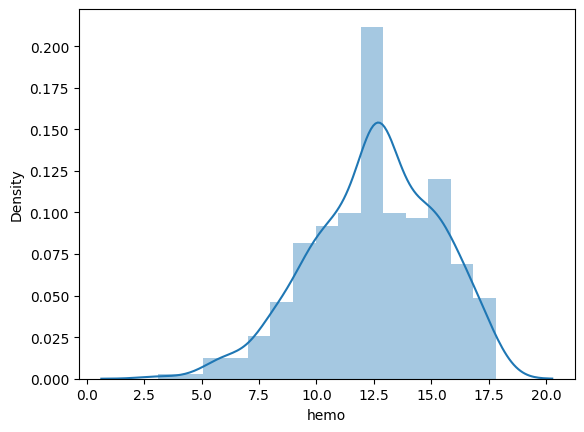

In [138]:
import seaborn as sns
sns.distplot(dataset["hemo"])

In [139]:
def get_pdf_probability(dataset, startrange, endrange) :
    from matplotlib import pyplot # Importing req Libries
    from scipy.stats import norm 
    ax=sns.distplot(dataset, kde=True, kde_kws={'color' : 'blue'}, color='Green')  #Making the curve and giveing colours
    pyplot.axvline(startrange, color="Red")
    pyplot. axvline(endrange, color= "Red") # Making probability stight or veritical line
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()  # oading dataset and geting mean and mode values
    print('Mean-%.3f, Standard Deviation-%.3f' % (sample_mean, sample_std)) # printing mean and mode
    # define the distribution
    dist = norm(sample_mean, sample_std) # by useing inbulit function  scipy.stats we can calculate norm
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)] By useing inline for loop to calculate probabilities sumation
    probabilities = [dist.pdf(value) for value in values] # by inbulit function dist.pdf we can take sumation
    prob=sum(probabilities)
    print("The area between range(({},{}):{}".format(startrange, endrange, sum(probabilities))) Th
    return prob

C:\Users\Dell\AppData\Local\Temp\ipykernel_17680\3393256282.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dataset, kde=True, kde_kws={'color' : 'blue'}, color='Green')


Mean-76.575, Standard Deviation-13.490
The area between range((40,60):0.09975653419845787


np.float64(0.09975653419845787)

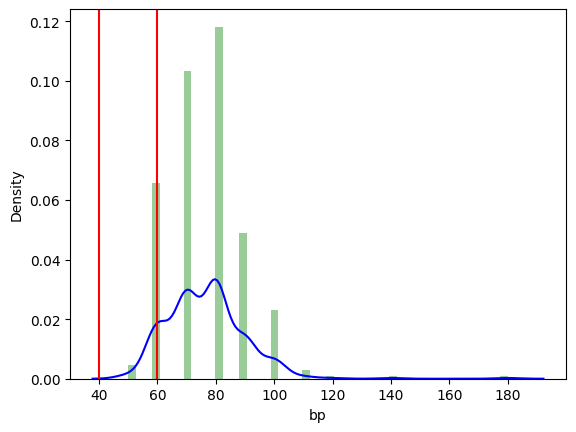

In [144]:
get_pdf_probability(dataset["bp"], 40,60)

In [145]:
def stand_nor_dist(dataset):
    #convertion of Normal distribution to  Standed Normal distribution graph
    import  seaborn as sns #importing requid moduel
    mean=dataset.mean() # finding mean with dataset
    std =dataset.std() # finding std with dataset
    values=[i for i in dataset] # passing dataset in list by useing for loop storeing in values
    z_score=[((s-mean)/std)for s in values] #passing  Normal SD formula in the Values list by useing for loop storeing in z_score
    sns.displot(z_score,kde=True) # Creating graph by list stored z_score  ###  Z_score is formula name to find SND
    sum(z_score)/len(z_score) # sumation 

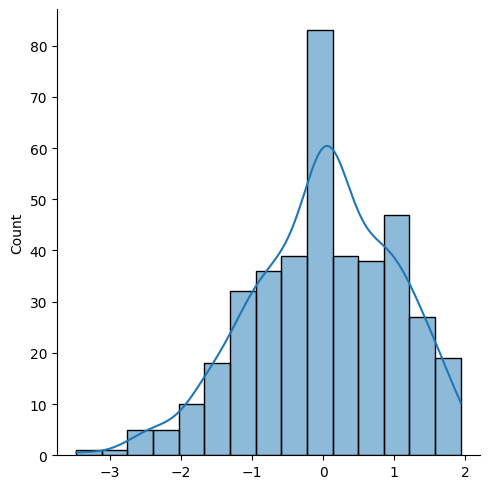

In [148]:
stand_nor_dist(dataset["hemo"])

In [46]:
indep=dataset[['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot']]
depen=dataset['hemo']

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(indep,depen,test_size=1/11,random_state=0)

In [67]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train) # standardtion for input to work better block
X_test=sc.transform(X_test)

In [68]:
from sklearn.linear_model import LinearRegression #procedure
regressor= LinearRegression()# procedure for all model same and by useing Sklearn and we are doing regression 
regressor.fit(X_train,y_train)

LinearRegression()

In [69]:
y_pread=regressor.predict(X_test)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pread)

In [70]:
r2_score

0.5704705000643926

In [ ]:
rom sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
param_grid ={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'C':[10,100,500,1000,2000,3000],'gamma':['auto','scale']}
grid=GridSearchCV(SVR(),param_grid ,refit=True, verbose =3,n_jobs=-1)
grid.fit(X_train,y_train)